# Project Presentation

## Aim of the Project:
As a group, we are planning on developing a platform that identifies mental health disorders according to symptoms provided by the patient. Our platform will help classify mental disorders and support the clinician with diagnosing the mental health disorder. Also, it may raise awareness and encourage people to seek help. We will work with a large dataset with multiple variables, which will be eventually evaluated by a machine learning algorithm.

## Project Deliverables:
We aim to create a machine learning application to help diagnose mental disorders. We will provide a machine learning model to develop an indicator or classifier to determine the mental health state of a person to support early detection. We will analyze the given data to finally make a code that shows data set of results.

If our project leads to a "Full success", our model will be used to detect a mental disorder from several features or states of a person. In this case, since we plan to create a code for a data set, Jupyter Notebook will be an appropriate interface.

On the other hand, if we happen to come up with a "Partial success", we will be at least able to show several relationships between features; for example, how an willingness to seek help from psychologists is related to a satisfaction with life? In this case, we will deliver data analysis in code, therefore a Jupyter Notebook will be an appropriate interface.

## Data Acquisition & Preparation

In [24]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

In [45]:
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

r = urlopen('https://www.datafiles.samhsa.gov/sites/default/files/MH-CLD-2019-DS0001-bndl-data-sas.zip').read()
file = ZipFile(BytesIO(r))
file_ = file.open('mhcld_puf_2019.sas7bdat')
df = pd.read_sas(file_, format='sas7bdat').replace(-9.0,np.nan)
df

,YEAR,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,...,ODDFLG,PDDFLG,PERSONFLG,SCHIZOFLG,ALCSUBFLG,OTHERDISFLG,STATEFIP,DIVISION,REGION,CASEID
0,2019.0,NaN,NaN,4.0,2.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6.0,3.0,2.019000e+10
1,2019.0,14.0,4.0,4.0,6.0,2.0,1.0,2.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,2.019000e+10
2,2019.0,12.0,NaN,4.0,3.0,2.0,1.0,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,2.019000e+10
3,2019.0,10.0,NaN,4.0,5.0,2.0,1.0,1.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,3.0,2.019000e+10
4,2019.0,2.0,2.0,4.0,5.0,2.0,1.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,3.0,2.019000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362039,2019.0,5.0,NaN,4.0,5.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,2.019636e+10
6362040,2019.0,4.0,4.0,4.0,6.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,2.019636e+10
6362041,2019.0,8.0,1.0,4.0,2.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,99.0,0.0,0.0,2.019636e+10
6362042,2019.0,11.0,4.0,4.0,4.0,1.0,2.0,1.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,99.0,0.0,0.0,2.019636e+10


In [46]:
df.keys()

Index(['YEAR', 'AGE', 'EDUC', 'ETHNIC', 'RACE', 'GENDER', 'SPHSERVICE',
       'CMPSERVICE', 'OPISERVICE', 'RTCSERVICE', 'IJSSERVICE', 'MH1', 'MH2',
       'MH3', 'SUB', 'MARSTAT', 'SMISED', 'SAP', 'EMPLOY', 'DETNLF', 'VETERAN',
       'LIVARAG', 'NUMMHS', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG',
       'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG', 'ODDFLG',
       'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG',
       'STATEFIP', 'DIVISION', 'REGION', 'CASEID'],
      dtype='object')

In [2]:
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

r = urlopen('https://www.datafiles.samhsa.gov/sites/default/files/MH-CLD-2019-DS0001-bndl-data-sas.zip').read()
file = ZipFile(BytesIO(r))
file_ = file.open('mhcld_puf_2019.sas7bdat')
df = pd.read_sas(file_, format='sas7bdat').replace(-9.0, np.nan).drop(['YEAR', 'NUMMHS', 'MH2', 'MH3','CASEID', 'DIVISION',
                'REGION', 'TRAUSTREFLG', 'ANXIETYFLG', 'ADHDFLG', 'CONDUCTFLG', 'DELIRDEMFLG', 'BIPOLARFLG', 'DEPRESSFLG',
                'ODDFLG', 'PDDFLG', 'PERSONFLG', 'SCHIZOFLG', 'ALCSUBFLG', 'OTHERDISFLG'], axis=1).dropna()

In [29]:
df

,AGE,EDUC,ETHNIC,RACE,GENDER,SPHSERVICE,CMPSERVICE,OPISERVICE,RTCSERVICE,IJSSERVICE,MH1,SUB,MARSTAT,SMISED,SAP,EMPLOY,DETNLF,VETERAN,LIVARAG,STATEFIP
32,10.0,3.0,4.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,6.0,3.0,4.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0
34,11.0,2.0,4.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,7.0,8.0,4.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0
58,11.0,4.0,4.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,7.0,7.0,1.0,1.0,1.0,5.0,5.0,2.0,2.0,1.0
59,9.0,4.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,2.0,7.0,7.0,4.0,3.0,1.0,5.0,5.0,2.0,2.0,1.0
65,12.0,3.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,2.0,7.0,6.0,3.0,1.0,1.0,5.0,1.0,2.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6361377,12.0,5.0,2.0,6.0,1.0,2.0,1.0,2.0,2.0,2.0,11.0,3.0,4.0,1.0,1.0,5.0,1.0,2.0,2.0,72.0
6361435,8.0,3.0,2.0,6.0,2.0,2.0,1.0,1.0,2.0,2.0,11.0,5.0,1.0,1.0,1.0,5.0,1.0,2.0,2.0,72.0
6361492,3.0,2.0,3.0,6.0,1.0,1.0,1.0,2.0,2.0,2.0,7.0,4.0,1.0,2.0,1.0,5.0,2.0,2.0,2.0,72.0
6361804,14.0,4.0,4.0,4.0,1.0,2.0,1.0,2.0,2.0,2.0,11.0,11.0,4.0,1.0,1.0,5.0,1.0,2.0,2.0,99.0


## Visualizations

In [47]:
def depression_chart(df, col, map_dict):
    """
    This function takes in a dataframe, a specified column, and a dictionary of
    numrical values to strings and outputs a pie chart showing the percentage of
    people diagnosed with depressive disorders for each value in the dictionary.
    """
    df = df[[col, "DEPRESSFLG"]] # get relevant columns
    # depressive disorder corresponds to 1 in the DEPRESSFLG column
    df = df[df["DEPRESSFLG"]==1] 
    df = df.dropna(subset=[col]) # drop nan values from RACE
    df[col] = df[col].map(map_dict) # map to string values
    # create the pie chart
    fig = px.pie(df,
                 values = df.groupby(col).size(),
                 names = df.groupby(col).groups.keys(),
                 title = "Number of People Diagnosed with Depressive Disorders by " + col)
    fig.show()

In [48]:
# Define the mapping dictionaries for race and gender
map_dict1 = {1: 'American Indian/Alaska Native',
             2: 'Asian',
             3: 'Black or African American',
             4: 'Native Hawaiian or Other Pacific Islander',
             5: 'White',
             6: 'Some other race alone/two or more races'}

map_dict2 = {1: "Male", 2: "Female"}

In [49]:
# plot race pie chart
depression_chart(df, "RACE", map_dict1)

In [50]:
# plot gender pie chart
depression_chart(df, "GENDER", map_dict2)

In [51]:
def nummhs_bar(df):
    """
    This function takes in a dataframe and creates a bar chart of the numer of
    people with more than 2 mental health diagnoses reported in each age group.
    """
    df = df[["AGE", "NUMMHS"]] # get relevant columns
    df = df[df["NUMMHS"]>=2] # find patients with more than 2 diagnoses
    df = df.dropna() # drop NaN values
    # create a dictionary for age values
    map_dict = {1: "0–11", 2: "12–14", 3: "15–17", 4: "18–20", 5: "21–24",
                6: "25–29", 7: "30–34", 8: "35–39", 9: "40–44", 10: "45–49",
                11: "50–54", 12: "55–59", 13: "60–64", 14: "> 65"}
    df["AGE"] = df["AGE"].map(map_dict) # mape age to dictionary-defined values
    # create the bar chart
    fig = px.bar(df,
                 y = df.groupby(["AGE"]).size(),
                 x = df.groupby("AGE").groups.keys(),
                 text = df.groupby(["AGE"]).size(),
                 title = "Number of Patients with More than 2 Mental Health Diagnoses Reported in Each Age Group",
                 labels = {'x': 'Age (Years)', 'y':'Number of Patients'})
    fig.show()

In [52]:
nummhs_bar(df)

In [58]:
def plot_states(df):
    """
    This function plots the average number of mental health diagnoses reported
    per individual vs. average age of patients in each state where the size of
    the state on the plot is controlled by the number of individuals who are
    from this state.
    """
    df = df[["STATEFIP", "NUMMHS", "AGE"]]
    df = df.dropna()
    # create a dictionary of states names
    states = pd.read_csv("state-fips.csv", header=None).set_index(0)
    states_dict = states.to_dict()[1]
    states_dict[72] = "Puerto Rico"
    states_dict[99] = "Other jurisdictions"
    # map state values to state names
    df["STATEFIP"] = df["STATEFIP"].map(states_dict)
    # create plot
    fig = px.scatter(df,
                     x = df.groupby("STATEFIP")["AGE"].mean(),
                     y = df.groupby("STATEFIP")["NUMMHS"].mean(), 
                     size = df.groupby("STATEFIP").size(),
                     color = df.groupby("STATEFIP").groups.keys(),
                     hover_name = df.groupby("STATEFIP").groups.keys(),
                     title = "Average Number of Mental Health Diagnoses Reported vs. Average Age",
                     labels = {'x': 'Age (Years)', 'y':'Average Number of Mental Health Diagnoses'})
    fig.update_layout(xaxis = dict(tickmode = 'array',
                                   tickvals = [5, 6, 7, 8, 9, 10],
                                   ticktext = ["21–24", "25–29", "30–34", "35–39", "40–44", "45–49"]))
    fig.show()

In [59]:
plot_states(df)

In [60]:
df["SAP"] = df["SAP"].map({2.0:0,1.0:1})

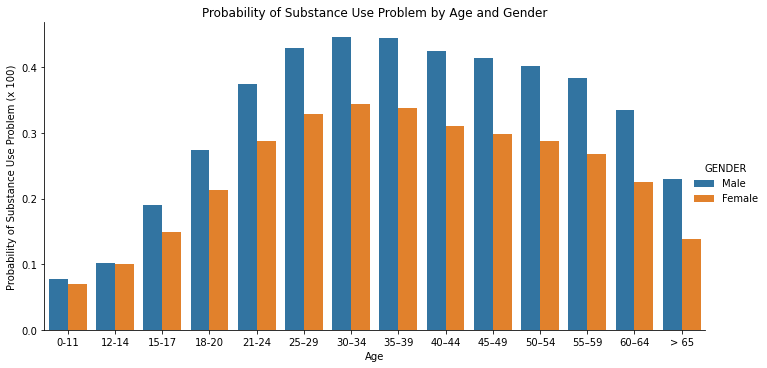

In [61]:
import seaborn as sns

label_age_range = ["0-11", "12-14", "15-17", "18-20", "21-24", "25–29", "30–34", "35–39", "40–44", "45–49",
                "50–54", "55–59", "60–64", "> 65"]




age_substance_use = sns.catplot(x="AGE", y="SAP", hue="GENDER", data=df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
age_substance_use.set_xticklabels(label_age_range)

gender_list = ["Male","Female"]
for t, l in zip(age_substance_use._legend.texts, gender_list): t.set_text(l)



plt.title('Probability of Substance Use Problem by Age and Gender')
plt.ylabel('Probability of Substance Use Problem (x 100)')
plt.xlabel('Age')

plt.show()

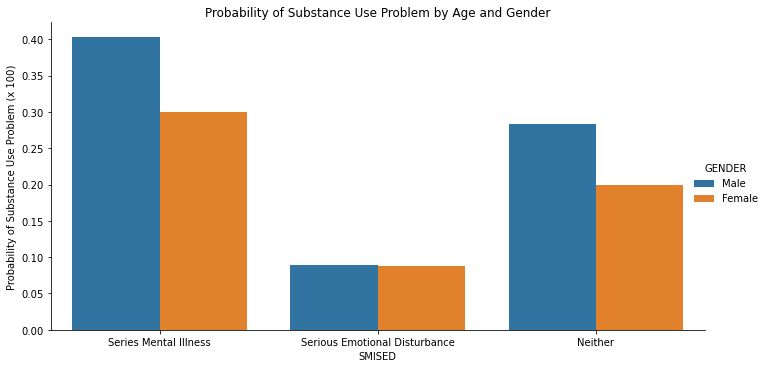

In [62]:
label_SMI_SED = ["Series Mental Illness", "Serious Emotional Disturbance", "Neither"]



age_substance_use = sns.catplot(x="SMISED", y="SAP", hue="GENDER", data=df, kind="bar",  ci=None, height=5, aspect=2, legend_out = True)
age_substance_use.set_xticklabels(label_SMI_SED)

gender_list = ["Male","Female"]
for t, l in zip(age_substance_use._legend.texts, gender_list): t.set_text(l)



plt.title('Probability of Substance Use Problem by Age and Gender')
plt.ylabel('Probability of Substance Use Problem (x 100)')

plt.show()

In [3]:
y = df['MH1']-1
X = df.drop(['MH1'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [4]:
model = models.Sequential()
model.add(layers.Dense(15, input_dim = 19, activation = 'relu'))
model.add(layers.Dense(15, activation = 'relu'))
model.add(layers.Dense(13, activation = 'softmax'))

In [5]:
model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    epochs = 100,
                    validation_data = (X_test, y_test))

Epoch 1/100
2405/2405 [==============================] - 3s 1ms/step - loss: 2.4228 - accuracy: 0.2608 - val_loss: 2.3950 - val_accuracy: 0.2925
Epoch 2/100
2405/2405 [==============================] - 3s 1ms/step - loss: 2.3935 - accuracy: 0.2946 - val_loss: 2.3859 - val_accuracy: 0.3026
Epoch 3/100
2405/2405 [==============================] - 3s 1ms/step - loss: 2.3889 - accuracy: 0.2985 - val_loss: 2.3979 - val_accuracy: 0.2889
Epoch 4/100
2405/2405 [==============================] - 2s 1ms/step - loss: 2.3869 - accuracy: 0.3008 - val_loss: 2.3829 - val_accuracy: 0.3050
Epoch 5/100
2405/2405 [==============================] - 3s 1ms/step - loss: 2.3858 - accuracy: 0.3019 - val_loss: 2.3829 - val_accuracy: 0.3049
Epoch 6/100
2405/2405 [==============================] - 3s 1ms/step - loss: 2.3853 - accuracy: 0.3018 - val_loss: 2.3862 - val_accuracy: 0.3022
Epoch 7/100
2405/2405 [==============================] - 3s 1ms/step - loss: 2.3849 - accuracy: 0.3023 - val_loss: 2.3815 - val_ac

In [6]:
def invert(dictionary):
    return {v: k for k, v in dictionary.items()}

In [7]:
AGE = {1 : "0-11 years", 2 : "12-14 years", 3 : "15-17 years", 4 : "18-20 years",
       5 : "21-24 years", 6 : "25-29 years", 7 : "30-34 years", 8 : "35-39 years",
       9 : "40-44 years", 10 : "45-49 years", 11 : "50-54 years",
       12 : "55-59 years", 13 : "60-64 years", 14 : "65 years and older"}
AGE = invert(AGE)
EDUC = {1 : "Special education", 2 : "0 to 8", 3 :"9 to 11", 4 :"12 (or GED)",
        5 :"More than 12"}
EDUC = invert(EDUC)
ETHNIC = {1 : "Mexican", 2 : "Puerto Rican",
          3 : "Other Hispanic or Latino origin",
          4 : "Not of Hispanic or Latino origin"}
ETHNIC = invert(ETHNIC)
RACE = {1 : "American Indian/Alaska Native", 2 : "Asian",
        3 : "Black or African American",
        4 : "Native Hawaiian or Other Pacific Islander", 5 : "White",
        6 : "Some other race alone/two or more races "}
RACE = invert(RACE)
GENDER = {1 : "Male", 2 : "Female"}
GENDER = invert(GENDER)
SPHSERVICE = {1 : "Served in a state psychiatric hospital",
              2 : "Not served in a state psychiatric hospital"}
SPHSERVICE = invert(SPHSERVICE)
CMPSERVICE = {1 : "Served in SMHA-funded/operated community-based program",
              2 : "Not served in SMHA-funded/operated community-based program"}
CMPSERVICE = invert(CMPSERVICE)
OPISERVICE = {1 : "Served in 'other psychiatric inpatient center'",
              2 : "Not served in 'other psychiatric inpatient center'"}
OPISERVICE = invert(OPISERVICE)
RTCSERVICE = {1 : "Served in a residential treatment center",
              2 : "Not served in a residential treatment center"}
RTCSERVICE = invert(RTCSERVICE)
IJSSERVICE = {1 : "Served by an institution under the justice system",
              2 : "Not served by any institution under the justice system"}
IJSSERVICE = invert(IJSSERVICE)
SUB = {1  : "Alcohol-induced disorder", 2  : "Alcohol intoxication",
       3  : "Substance-induced disorder", 4  : "Alcohol dependence",
       5  : "Cocaine dependence", 6  : "Cannabis dependence",
       7  : "Opioid dependence", 8  : "Other substance dependence",
       9  : "Alcohol abuse", 10 : "Cocaine abuse", 11 : "Cannabis abuse",
       12 : "Opioid abuse", 13 : "Other substance related conditions"}
SUB = invert(SUB)
MARSTAT = {1 : "Never married", 2 : "Now married", 3 : "Separated",
           4 : "Divorced, widowed"}
MARSTAT = invert(MARSTAT)
SMISED = {1 : "SMI", 2 : "SED and/or at risk for SED", 3 : "Not SMI/SED"}
SMISED = invert(SMISED)
SAP = {1 :"Yes", 2 :"No"}
SAP = invert(SAP)
EMPLOY = {1 : "Full-time", 2 : "Part-time",
          3 : "Employed full-time/part-time not differentiated",
          4 : "Unemployed", 5 : "Not in labor force"}
EMPLOY = invert(EMPLOY)
DETNLF = {1 : "Retired, disabled", 2 : "Student", 3 : "Homemaker",
          4 : "Sheltered/non-competitive employment", 5 : "Other"}
DETNLF = invert(DETNLF)
VETERAN = {1 :"Yes", 2 :"No"}
VETERAN = invert(VETERAN)
LIVARAG = {1 : "Homeless", 2 : "Private residence", 3 : "Other"}
LIVARAG = invert(LIVARAG)
STATEFIP = {1 :'Alabama', 2 :'Alaska', 4 :'Arizona', 5 :'Arkansas',
            6 :'California', 8 :'Colorado', 9 :'Connecticut', 10 :'Delaware',
            11 :'District of Columbia', 12 :'Florida', 13 :'Georgia',
            15 :'Hawaii', 16 :'Idaho', 17 :'Illinois', 18 :'Indiana',
            19 :'Iowa', 20 :'Kansas', 21 :'Kentucky', 22 :'Louisiana',
            23 :'Maine', 24 :'Maryland', 25 :'Massachusetts', 26 :'Michigan',
            27 :'Minnesota', 28 :'Mississippi', 29 :'Missouri', 30 :'Montana',
            31 :'Nebraska', 32 :'Nevada', 33 :'New Hampshire', 34 :'New Jersey',
            35 :'New Mexico', 36 :'New York', 37 :'North Carolina',
            38 :'North Dakota', 39 :'Ohio', 40 :'Oklahoma', 41 :'Oregon',
            42 :'Pennsylvania', 44 :'Rhode Island', 45 :'South Carolina',
            46 :'South Dakota', 47 :'Tennessee', 48 :'Texas', 49 :'Utah',
            50 :'Vermont', 51 :'Virginia', 53 :'Washington',
            54 :'West Virginia', 55 :'Wisconsin', 56 :'Wyoming',
            72 :'Puerto Rico', 99 :'Other jurisdictions'}
STATEFIP = invert(STATEFIP)
MH1 = {1 : 'Trauma- and stressor-related disorders',
       2 : 'Anxiety disorders',
       3 : 'Attention deficit/hyperactivity disorder (ADHD)',
       4 : 'Conduct disorders',
       5 : 'Delirium, dementia',
       6 : 'Bipolar disorders',
       7 : 'Depressive disorders',
       8 : 'Oppositional defiant disorders',
       9 : 'Pervasive developmental disorders',
       10 : 'Personality disorders',
       11 : 'Schizophrenia or other psychotic disorders',
       12 : 'Alcohol or substance use disorders',
       13 : 'Other disorders/conditions'}

In [8]:
from pywebio.output import *
from pywebio.input import * 
import time

put_markdown('# Mental Health Diagnosis Survey')

put_text("Please answer the following questions for a mental health diagnosis prediction.")


selections = input_group('Please answer the following questions',
                         [select(label = 'Age Group', options = AGE.keys(), name = 'age'),
                          select(label = 'Education', options = EDUC.keys(), name = 'education'),
                          select(label = 'Ethnicity', options = ETHNIC.keys(), name = 'ethnicity'),
                          select(label = 'Race', options = RACE.keys(), name = 'race'),
                          select(label = 'Gender', options = GENDER.keys(), name = 'gender'),
                          select(label = 'State psychiatric hospital services', options = SPHSERVICE.keys(), name = 'sph'),
                          select(label = 'SMHA-funded/operated community-based program', options = CMPSERVICE.keys(), name = 'cmp'),
                          select(label = 'Other psychiatric inpatient', options = OPISERVICE.keys(), name = 'opi'),
                          select(label = 'Residential treatment center', options = RTCSERVICE.keys(), name = 'rtc'),
                          select(label = 'Institutions under the justice system', options = IJSSERVICE.keys(), name = 'ijs'),
                          select(label = 'Substance use diagnosis', options = SUB.keys(), name = 'sub'),
                          select(label = 'Marital status', options = MARSTAT.keys(), name = 'marriage'),
                          select(label = 'SMI/SED status', options = SMISED.keys(), name = 'smi'),
                          select(label = 'Substance use problem', options = SAP.keys(), name = 'sap'),
                          select(label = 'Employment status', options = EMPLOY.keys(), name = 'employment'),
                          select(label = 'Detailed \'not in labor force\' category', options = DETNLF.keys(), name = 'detnlf'),
                          select(label = 'Veteran status', options = VETERAN.keys(), name = 'veteran'),
                          select(label = 'Residential status', options = LIVARAG.keys(), name = 'res'),
                          select(label = 'State', options = STATEFIP.keys(), name = 'state'),
])

put_text("Please wait until we make our predictions!")

input_ = np.array([[AGE[selections['age']], EDUC[selections['education']], ETHNIC[selections['ethnicity']],
                    RACE[selections['race']], GENDER[selections['gender']], SPHSERVICE[selections['sph']],
                    CMPSERVICE[selections['cmp']], OPISERVICE[selections['opi']], RTCSERVICE[selections['rtc']],
                    IJSSERVICE[selections['ijs']], SUB[selections['sub']], MARSTAT[selections['marriage']],
                    SMISED[selections['smi']], SAP[selections['sap']], EMPLOY[selections['employment']],
                    DETNLF[selections['detnlf']], VETERAN[selections['veteran']], LIVARAG[selections['res']],
                    STATEFIP[selections['state']]]])
q = model.predict(input_)
prediction = np.argmax(q,axis=1)[0] + 1

put_processbar('bar')
for i in range(1, 11):
    set_processbar('bar', i / 10)
    time.sleep(0.1)
p = MH1[prediction]
put_markdown("Here is our prediction: %s" % p)

Depressive disorders
